In [2]:
#импортируем нужные нам библиотеки 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#импортируем  класс для выполнения линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#библиотека для облегчения изучения и использования библиотеки scikit-learn
import mglearn 

In [3]:
from sklearn.datasets import load_diabetes

In [5]:
# загружаем датасет load_diabetes в переменную dia_data
dia_data = load_diabetes()

In [6]:
# выводим список ключей
print(dia_data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [7]:
#выводим информацию о датасете
print(dia_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
#age - возраст в годах
#sex - пол
#bmi - масса тела
#bp - среднее артериальное давление
#s1 - Общий уровень холестерина в сыворотке крови 
#s2 - Уровень липопротеинов низкой плотности
#s3 - Уровень липопротеинов высокой плотности 
#s4 - Отношение общего холестерина к холестерину высокой плотности 
#s5 - Возможно, логарифм уровня триглицеридов в сыворотке 
#s6 - Уровень сахара в крови 
print(dia_data['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [9]:
# 442 - количество пациентов в наборе данных.
# 10 -  количество признаков.
X, y = dia_data.data, dia_data.target
print ("форма массива X: {}" .format (X. shape))

форма массива X: (442, 10)


In [10]:
#создали объект DataFrame из данных датасета 
#используя команду head() выводим первые нескольких, чтобы увидеть, как данные выглядят.
dia_df = pd.DataFrame(data=dia_data.data, columns=dia_data.feature_names)
dia_df['target'] = dia_data.target
dia_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [11]:
#так же можно вывести данные в таком виде
print(dia_df.iloc[0])

age         0.038076
sex         0.050680
bmi         0.061696
bp          0.021872
s1         -0.044223
s2         -0.034821
s3         -0.043401
s4         -0.002592
s5          0.019907
s6         -0.017646
target    151.000000
Name: 0, dtype: float64


In [12]:
#Этот массив представляет количественную меру прогрессии диабета
print(dia_data['target'])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [13]:
#провреяем количесво пропущенных значений, чтобы позже мы могли работать с данными
#результат равен нулю для всех столбцов, это означает, что в данных нет пропущенных значений, и данные полные
dia_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

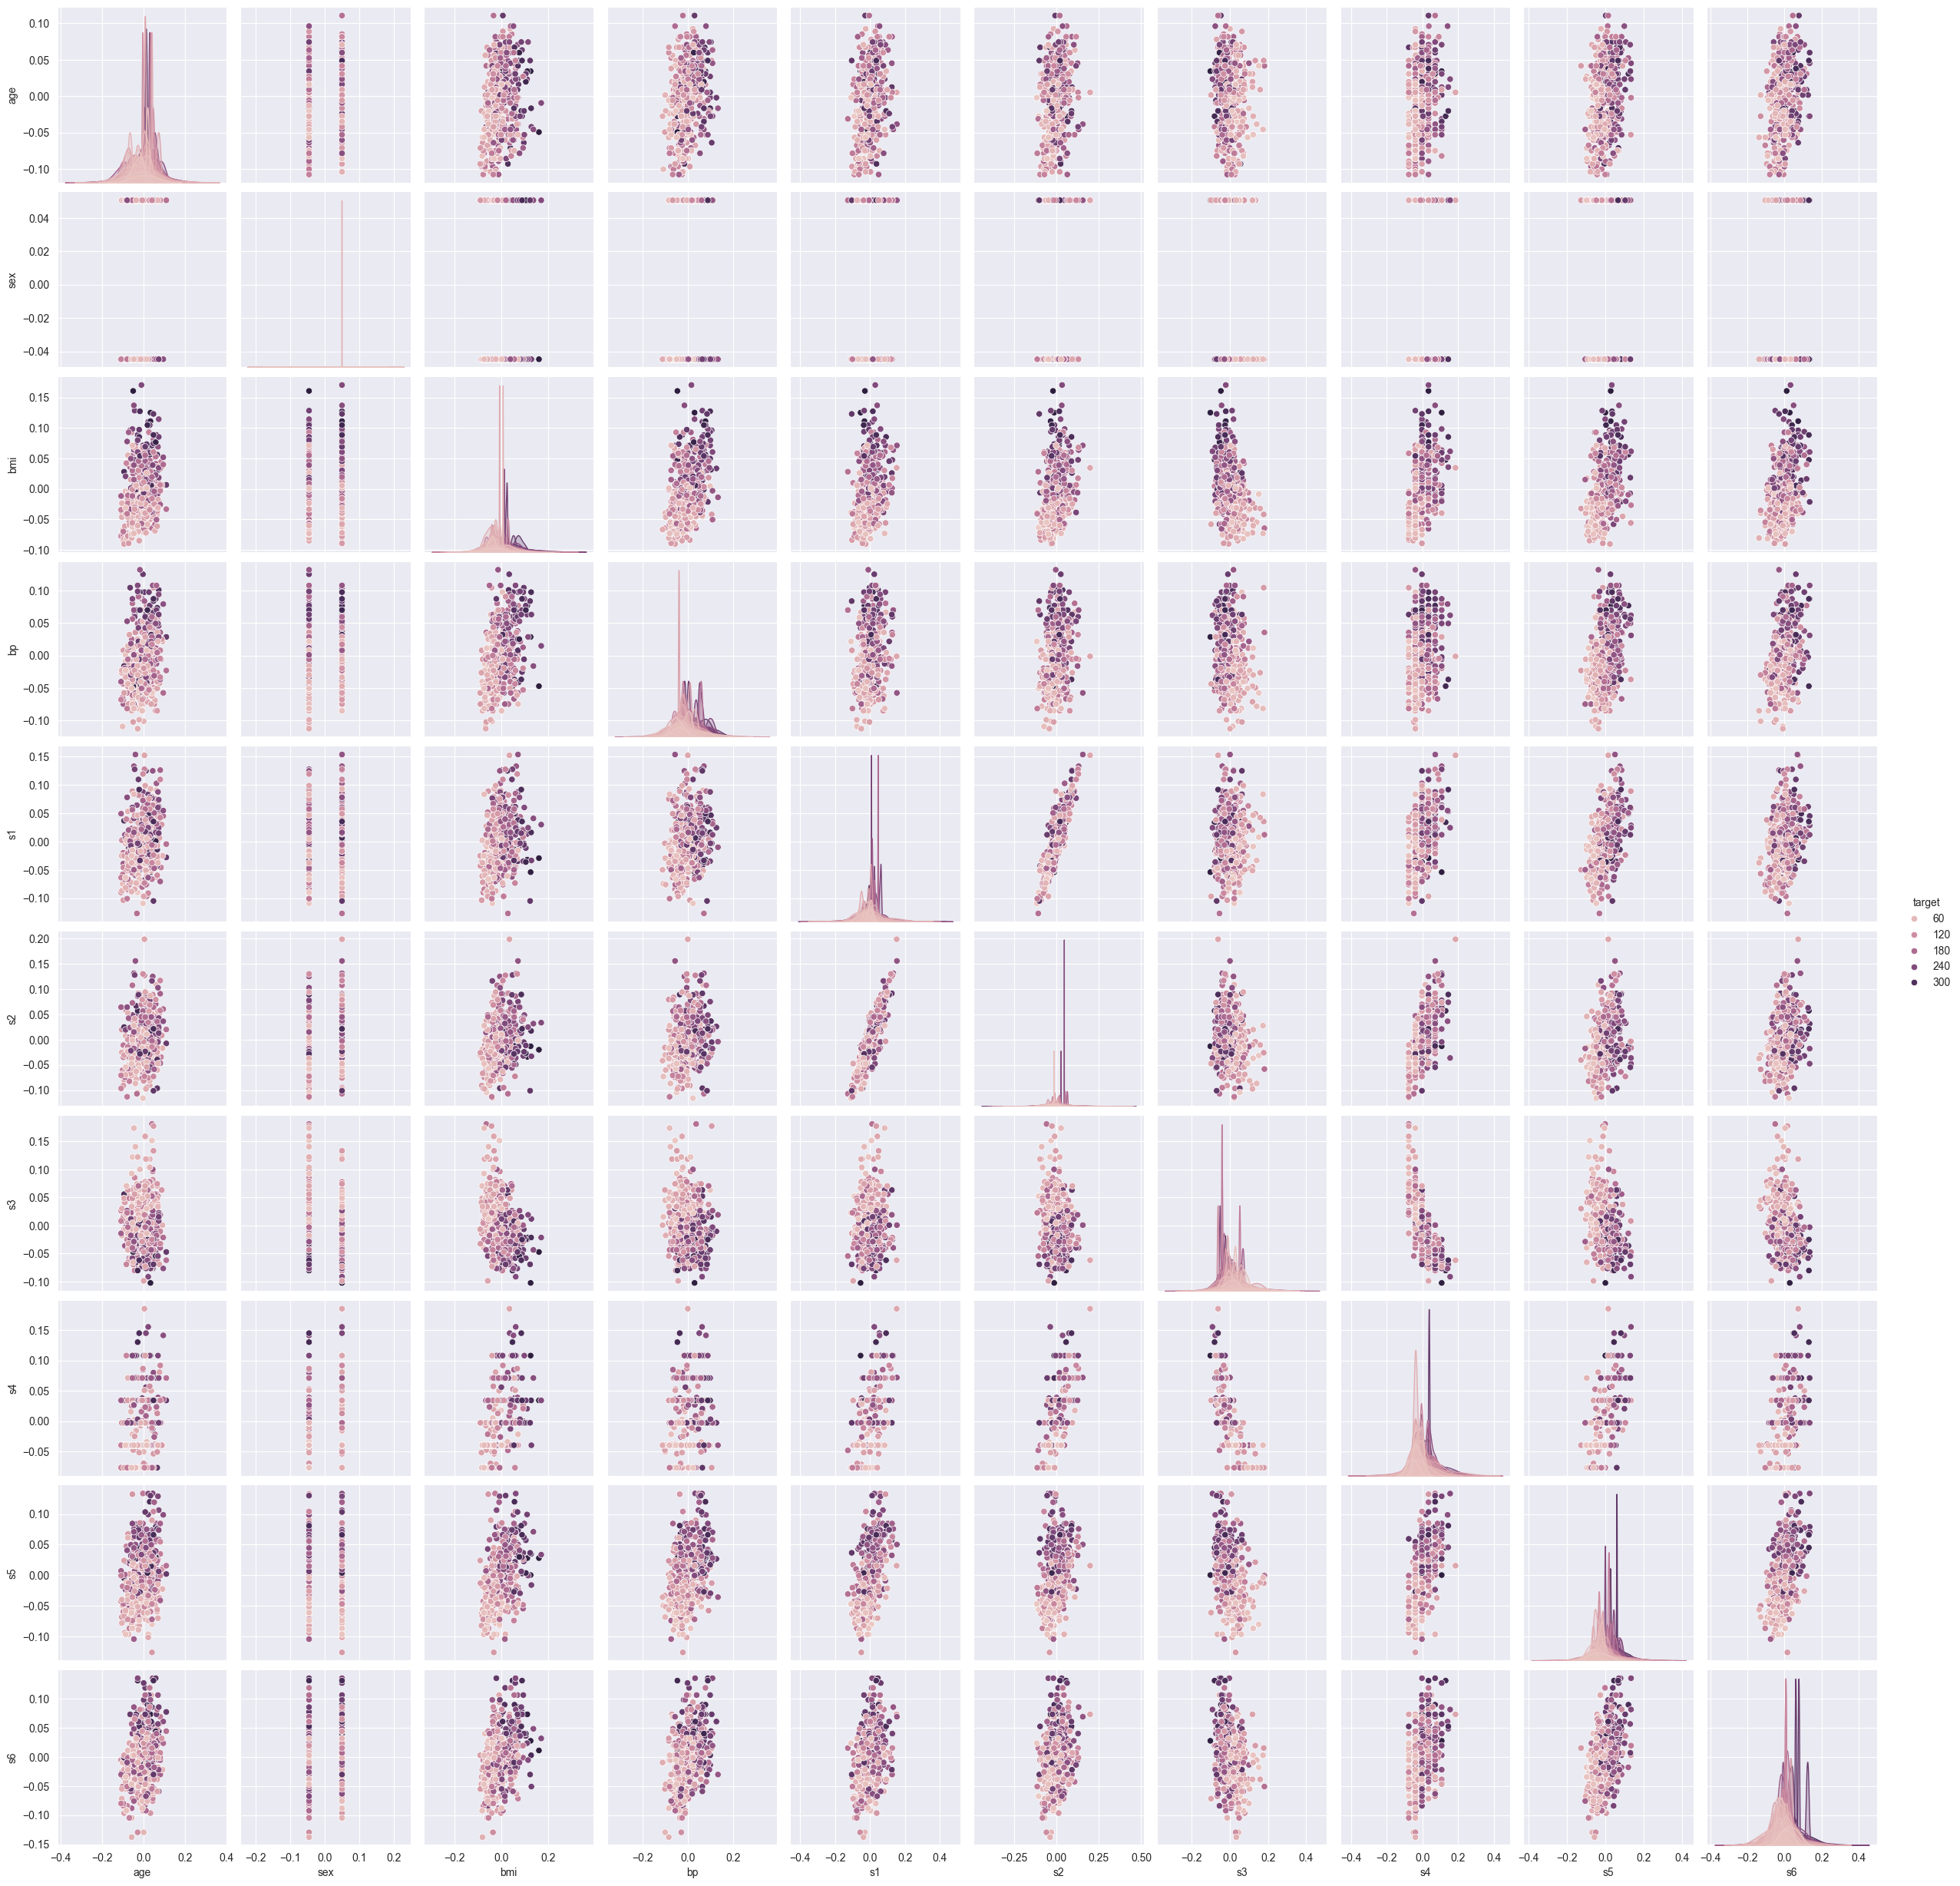

In [20]:
# Создаем матрицу диаграмм рассеяния
diabetes_df = pd.DataFrame(data=dia_data.data, columns=dia_data.feature_names)
diabetes_df['target'] = dia_data.target
sns.pairplot(diabetes_df, vars=diabetes_df.columns[:-1], hue='target')
plt.show()

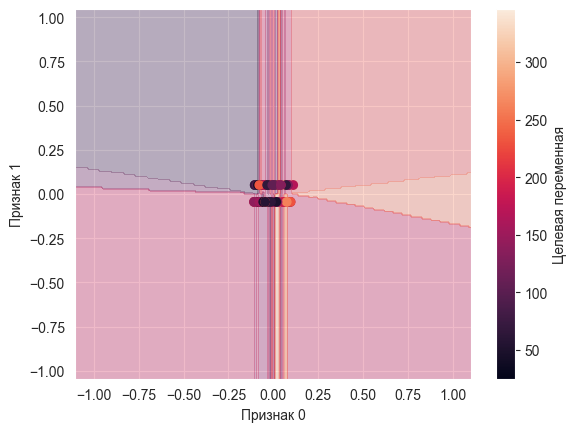

In [12]:
#используя модель KNeighborsRegressor мы предсказываем значения целевой переменной на основе 2 признаков
# Выбираем два признака для визуализации
# Создадаем сетку точек для построения графика
# Далее создадаем модель регрессора k-ближайших соседей
# и строим график
from sklearn.neighbors import KNeighborsRegressor
X = dia_data.data[:, :2]  
y = dia_data.target


xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01))


model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.colorbar(label="Целевая переменная")
plt.show()

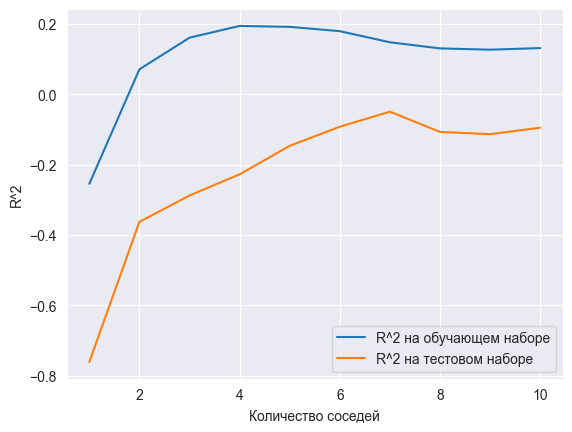

In [13]:
#оцениаем модель для прогноа количественной меры прогрессирования диабета в зависимости от двух первых признаков
# Выберем первые два признака для визуализации
X = dia_data.data[:, :2]  
y = dia_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
   
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

# строим график
plt.plot(neighbors_settings, training_accuracy, label="R^2 на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="R^2 на тестовом наборе")
plt.ylabel("R^2")
plt.xlabel("Количество соседей")
plt.legend()
plt.show()


Среднеквадратичное отклонение (MSE): 3364.3932584269664


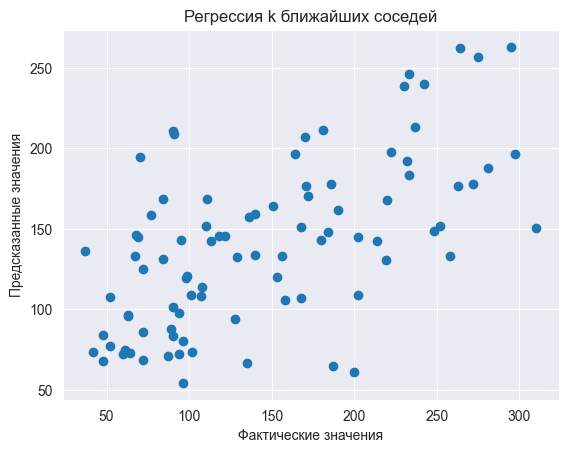

In [15]:
#создаем модель KNeighborsRegressor, обучили ее на обучающих данных и оценивает ее на тестовых данных, а затем визуализируем результаты 
# Количество соседей - 3
X =dia_data.data
y = dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 3  
regressor = KNeighborsRegressor(n_neighbors=k)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Среднеквадратичное отклонение (MSE): {mse}")

plt.scatter(y_test, y_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Регрессия k ближайших соседей")
plt.show()

Среднеквадратичное отклонение (MSE): 3278.9108146067415


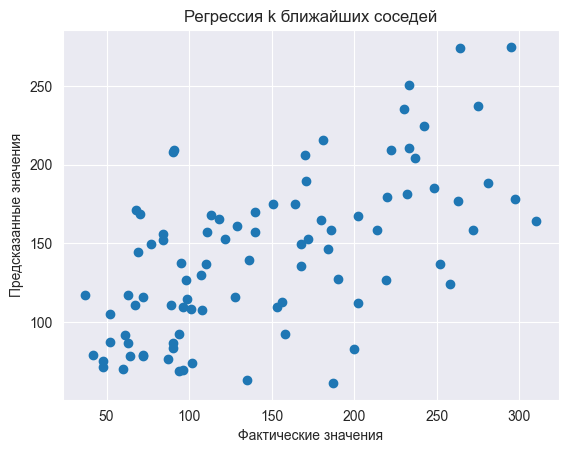

In [16]:
# Количество соседей - 4
X =dia_data.data
y = dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 4  
regressor = KNeighborsRegressor(n_neighbors=k)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Среднеквадратичное отклонение (MSE): {mse}")

plt.scatter(y_test, y_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Регрессия k ближайших соседей")
plt.show()

Среднеквадратичное отклонение (MSE): 3019.075505617978


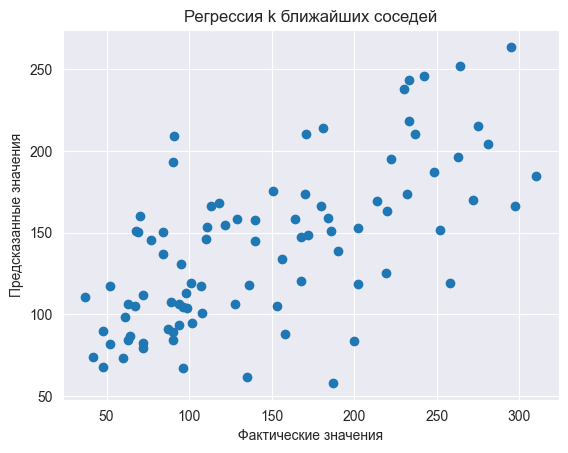

In [17]:
# Количество соседей - 5
X =dia_data.data
y = dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k = 5 
regressor = KNeighborsRegressor(n_neighbors=k)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Среднеквадратичное отклонение (MSE): {mse}")

plt.scatter(y_test, y_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Регрессия k ближайших соседей")
plt.show()

In [44]:
#модел K-ближайших соседей
#делим данные на обучающий и тестовый наборы
# создали объект модели Ridge
# Обучили
X = dia_data.data
y = dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [46]:
# Вывели результат
print( "Прогнозы для тестового набора: \n{}". format (y_pred))
print(len(y_pred))

Прогнозы для тестового набора: 
[247.33333333 181.66666667 158.33333333 116.66666667 185.66666667
 222.66666667  81.         218.66666667 163.         270.33333333
 167.66666667 197.66666667 133.33333333  68.33333333 294.
  60.         132.33333333  70.33333333 123.         249.66666667
 207.33333333 155.33333333 167.         108.66666667 203.
 190.33333333 101.66666667  65.33333333 189.33333333 186.33333333
 229.          63.66666667 176.33333333 222.          88.66666667
 161.66666667 190.33333333 110.66666667 118.33333333 161.33333333
 157.         155.33333333 151.66666667 206.66666667 145.
  66.66666667 118.33333333 100.66666667 140.33333333 219.
 116.33333333  77.         204.33333333 124.         275.33333333
 136.66666667 145.66666667 111.33333333 110.66666667 215.33333333
 178.33333333  89.33333333 135.         113.         270.66666667
 162.66666667  57.66666667 284.33333333 196.          84.33333333
 131.33333333 169.33333333  80.         110.33333333 166.33333333
 126.33333

In [47]:
print ("R^2 на тестовом наборе: {:.2f}" . format (reg. score(X_test, y_test)))

R^2 на тестовом наборе: 0.15


In [53]:
#Простая линейная регрессия
#использовали "Возраст" для прогнозирования
model = LinearRegression()

X_age = dia_data.data[:, 0].reshape(-1, 1)
y = dia_data.target

model.fit(X_age, y)

predictions = model.predict(X_age)
print(predictions)
print(len(predictions))

[163.71553045 151.56100659 178.07996773 125.04204544 153.77092002
 123.93708873 138.30152602 171.45022745 164.82048716 130.56682902
 122.83213202 160.4006603  157.08579016 153.77092002 165.92544388
 136.09161259 150.45604987 173.66014088 140.51143945 143.82630959
 137.1965693  126.14700216 126.14700216 165.92544388 132.77674244
 131.67178573 119.51726187 144.9312663  168.1353573  172.55518416
 133.88169916 144.9312663  162.61057373 161.50561702 157.08579016
 167.03040059 155.98083345 149.35109316 151.56100659 151.56100659
 153.77092002 121.7271753  133.88169916 158.19074688 165.92544388
 160.4006603  134.98665587 128.35691559 172.55518416 139.40648273
 162.61057373 170.34527073 136.09161259 149.35109316 137.1965693
 139.40648273 139.40648273 143.82630959 164.82048716 171.45022745
 130.56682902 139.40648273 143.82630959 141.61639616 172.55518416
 138.30152602 149.35109316 164.82048716 163.71553045 157.08579016
 151.56100659 151.56100659 171.45022745 155.98083345 155.98083345
 149.351093

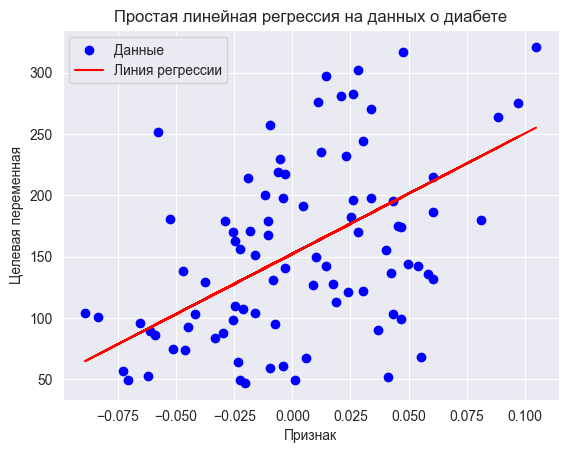

In [55]:
#используя третий признак данных о диабете, разбиваем данные на обучающий и тестовый наборы, 
# обучаем модель 
# предсказазываем 
# и визуализируем
X = dia_data.data[:, np.newaxis, 2]  
y = dia_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, label='Данные', color='blue')
plt.plot(X_test, y_pred, label='Линия регрессии', color='red')
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')
plt.title('Простая линейная регрессия на данных о диабете')
plt.legend()
plt.show()


In [59]:
#В множественной линейной регрессии мы используем признаки: age,bmi,bp,s5 для прогнозирования

X_multi = dia_data.data[:, [0, 2, 3, 8]]
model.fit(X_multi, y)
predictions_multi = model.predict(X_multi)
print(predictions_multi)


[204.49461573  76.202566   174.76149663 151.95280605 118.28765467
 104.07184688  86.78970562 146.45026962 167.99663005 207.43250435
  73.82897337  98.98348291 114.44805229 174.14521114 113.33190094
 185.89356241 220.39320864 186.56722843 127.57607339 126.59789072
 101.68262984 103.37735953 117.63390059 268.76050885 156.26436839
 147.35129778  80.01022819 169.34967167 115.81345509 195.28073277
 161.5875815   70.86441181 234.1056621  109.59384183  64.50378389
 129.19224394 210.08747205 152.85446854 261.62432524 150.89567357
 159.77616524  58.70641514 139.17960623  93.9191723  211.15535827
 130.10554231 134.36491962  86.13611175  93.9746108  180.81648141
 138.36079146 165.69192451 137.48188048 143.94893026 149.18095114
  77.64552585 190.38681682  70.3838067  120.69597882 157.91770535
 113.77125302 162.33556024  92.57472371  97.52485459 111.72450624
 179.40680795 132.68478993 129.8403267  114.02857206  93.59188377
  71.92970361 221.77674046 189.72348424 135.85848235 170.5283353
 130.052991

In [67]:
#метод линейной регрессии
X, y = dia_data.data, dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

# Вывод коэффициентов и интерсепта модели
print("Коэффициенты модели: {}".format(lr.coef_))
print("Интерсепт: {}".format(lr.intercept_))

Коэффициенты модели: [  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
Интерсепт: 151.6651755919933


In [70]:
print ("Правильность на обучающем наборе: {:.2f}" .format (lr .score (X_train, y_train)))
print ("Правильность на тестовом набора {:.2f}" .format(lr.score (X_test, y_test)))

Правильность на обучающем наборе: 0.52
Правильность на тестовом набора 0.48


In [72]:
#гребневая регрессия
#делим данные на обучающий и тестовый наборы
# создали объект модели Ridge
# Обучили
# Вывели результат
from sklearn.linear_model import Ridge

X = dia_data.data
y = dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alpha = 1.0  
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print ("Правильность на обучающем наборе: {:.2f}" .format (lr .score (X_train, y_train)))
print ("Правильность на тестовом набора {:.2f}" .format(lr.score (X_test, y_test)))


Правильность на обучающем наборе: 0.53
Правильность на тестовом набора 0.44


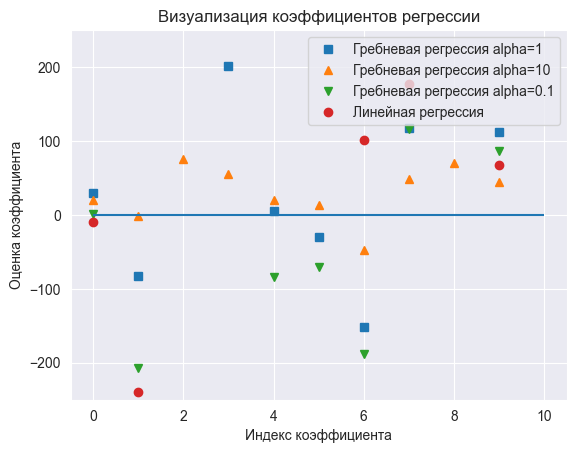

In [73]:
#визуализируем коэффициенты регрессии для различных моделей
X = dia_data.data
y = dia_data.target

ridge1 = Ridge(alpha=1)
ridge10 = Ridge(alpha=10)
ridge01 = Ridge(alpha=0.1)
lr = LinearRegression()

ridge1.fit(X, y)
ridge10.fit(X, y)
ridge01.fit(X, y)
lr.fit(X, y)

plt.plot(ridge1.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-250, 250)
plt.legend()
plt.title("Визуализация коэффициентов регрессии")
plt.show()


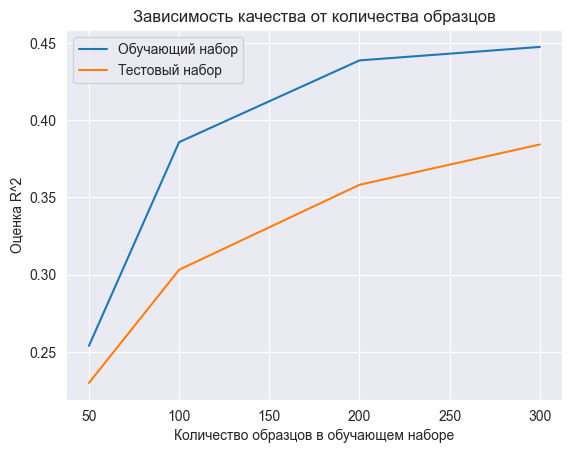

In [78]:
#Разбиваем данные на обучающий и тестовый наборы.
# создали объект модели Ridge
# Обучили
# Оцениваем качество модели 
# Строим графики зависимости 
X, y = dia_data.data, dia_data.target
n_samples = [50, 100, 200, 300]
train_scores = []
test_scores = []

for n in n_samples:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n, random_state=0)
    
    ridge = Ridge(alpha=1).fit(X_train, y_train)
    
    train_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))

plt.plot(n_samples, train_scores, label="Обучающий набор")
plt.plot(n_samples, test_scores, label="Тестовый набор")
plt.xlabel("Количество образцов в обучающем наборе")
plt.ylabel("Оценка R^2")
plt.legend()
plt.title("Зависимость качества от количества образцов")
plt.show()

In [85]:
#Lasso регрессии
#делим данные на обучающий и тестовый наборы
#создали объект модели Lasso
#Обучили
#Вывели результат
from sklearn.linear_model import Lasso
X, y = dia_data.data, dia_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lasso = Lasso(alpha=1).fit(X_train, y_train)

print("Коэффициенты Lasso: {}".format(lasso.coef_))
print("Оценка на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Оценка на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))


Коэффициенты Lasso: [  0.          -0.         409.68653825   0.           0.
   0.          -0.           0.         336.9591004    0.        ]
Оценка на обучающем наборе: 0.40
Оценка на тестовом наборе: 0.26


In [87]:
# Загружаем данные из датасета и преобразуем целевую переменную: dia_data.target > 140 преобразует задачу в бинарную, где 1 означает, что целевое значение больше 140, а 0 - меньше или равно 140.
# Разбиваем данные на обучающий и тестовый наборы  
# выполняем стандартизацию признаков
# Создаем модель логистической регрессии, обучаем ее 
# Оцениваем точность модели
# Выводим результат
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X, y = dia_data.data, (dia_data.target > 140).astype(int) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

train_accuracy = logistic_regression.score(X_train, y_train)
test_accuracy = logistic_regression.score(X_test, y_test)

print("Точность на обучающем наборе: {:.2f}".format(train_accuracy))
print("Точность на тестовом наборе: {:.2f}".format(test_accuracy))


Точность на обучающем наборе: 0.76
Точность на тестовом наборе: 0.72


Работа с датасетом о диабете позволяет нам исследовать и применить различные методы машинного обучения для задачи регрессии и классификации. Датасет предоставляет информацию о различных медицинских показателях пациентов, таких как возраст, индекс массы тела, уровень сахара в крови и другие, а также количественную меру прогрессирования заболевания диабета.

В ходе работы с датасетом о диабете, мы выполнили следующие шаги:

1. Загрузили датасет, изучили его 

2. Выполнили предобработку данных, включая стандартизацию и разделение данных на обучающий и тестовый наборы.

3. Применили линейные модели регрессии (Linear Regression) для прогнозирования количественной меры прогрессирования диабета. Мы оценили качество модели и визуализировали коэффициенты.

4. Исследовали метод регуляризации с помощью гребневой регрессии (Ridge) и лассо-регрессии (Lasso) для оптимизации модели.

5. Применили логистическую регрессию (Logistic Regression) для задачи классификации и оценили точность модели 

6. Визуализировали результаты, чтобы наглядно представить влияние параметров на качество моделей.

В результате наших исследований, мы смогли подобрать оптимальные параметры моделей и оценить их точность. Датасет о диабете дал нам возможность практически применить различные методы машинного обучения для анализа и прогнозирования медицинских данных.